## Music Recommendation System using Spotify Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('spotify_dataset.csv')

In [17]:
df.head(5)

,Serial Number,Song,Artist,Genres,Album,Duration,Album Label,Country,Streams
0,1,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,NaN
1,2,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,NaN
2,3,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,04:35,YRF Music,India,NaN
3,4,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,04:43,Zee Music Company,India,NaN
4,5,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,05:40,T-Series,India,NaN


### Data Cleaning

In [18]:
df.shape

(170, 9)

In [19]:
df.isnull().sum()

Serial Number      0
Song               0
Artist             0
Genres             8
Album              0
Duration           0
Album Label        1
Country            3
Streams          170
dtype: int64

In [20]:
df.drop(columns='Serial Number',inplace=True)
df.drop(columns='Streams',inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df[['minutes','sec']]=df['Duration'].str.split(':',expand=True)

In [23]:
df.minutes.value_counts()

03            78
04            39
02            32
05             9
06             6
01             5
02-12-2016     1
Name: minutes, dtype: int64

In [24]:
df.drop(df.index[df['minutes'] == '02-12-2016'], inplace=True)

In [25]:
df.head(1)

,Song,Artist,Genres,Album,Duration,Album Label,Country,minutes,sec
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,04,00


In [26]:
df['minutes']=df['minutes'].astype(int)
df['sec']=df['sec'].astype(int)

In [27]:
totaldur=(df.minutes*60)+df.sec
df['totaldurr']=totaldur

In [28]:
df.head(2)

,Song,Artist,Genres,Album,Duration,Album Label,Country,minutes,sec,totaldurr
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,04:00,Eros Music,India,4,0,240
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,04:49,Sony Music Entertainment India Pvt. Ltd.,India,4,49,289


In [29]:
df.drop(['minutes','Duration','sec'],axis=1,inplace=True)

In [30]:
df.head(5)

,Song,Artist,Genres,Album,Album Label,Country,totaldurr
0,"Pani Da Rang Male (From ""Vicky Donor"")",Ayushmann Khurrana,World/Traditional,Vicky Donor,Eros Music,India,240
1,Channa Mereya,"Pritam,Arijit Singh",World/Traditional,Ae Dil Hai Mushkil (Original Motion Picture So...,Sony Music Entertainment India Pvt. Ltd.,India,289
2,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi","Pop, World/Traditional, Hip Hop",Fanaa,YRF Music,India,275
3,Yeh Fitoor Mera,Arijit Singh,World/Traditional,Fitoor,Zee Music Company,India,283
4,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,World/Traditional,Best Of Shraddha Kapoor,T-Series,India,340


In [31]:
df.describe()

,totaldurr
count,169.000000
mean,220.147929
std,58.466377
min,95.000000
25%,184.000000
50%,213.000000
75%,247.000000
max,409.000000


### Data Analysis

In [32]:
value_count = pd.DataFrame({'Top 5 Album labels':df['Album Label'].value_counts().head(5)})
value_count.style.background_gradient(cmap='hot')

,Top 5 Album labels
T-Series,16
Republic Records,14
Sony Music Entertainment India Pvt. Ltd.,7
Columbia,5
Atlantic Records,4


In [33]:
value_count = pd.DataFrame({'Top 5 Genres':df['Genres'].value_counts().head(5)})
value_count.style.background_gradient(cmap='hot')

,Top 5 Genres
Hip Hop,27
Pop,24
World/Traditional,19
"Hip Hop, World/Traditional",9
"Pop, Dance/Electronic",7


Text(0.5, 1.0, 'Top 3 Artist')

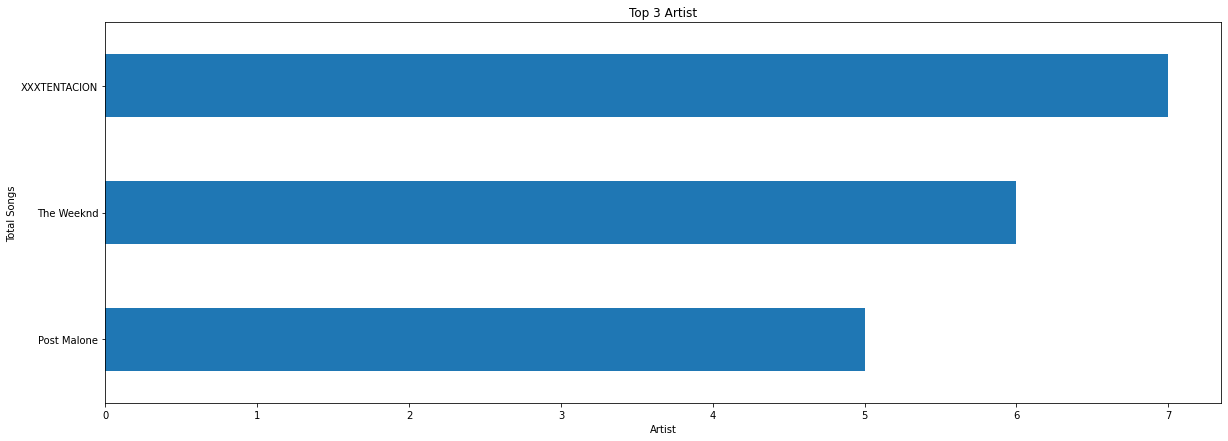

In [34]:
plt.figure(figsize=(20,7))
df['Artist'].value_counts().head(3).sort_values().plot(kind = 'barh')
plt.ylabel('Total Songs')
plt.xlabel('Artist')
plt.title('Top 3 Artist')